The dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: <mark>cars-dataset.csv</mark> View in a new window <br/><br/>
<mark> <u><b> Attribute Information: <br/> </mark>
Car Name – Name of the car <br/>
Cyl – No of cylinders in the car – Multivalued discrete <br/>
Disp – Displacement – continuous <br/>
Hp – Horsepower – continuous <br/>
Wt – Weight – continuous <br/>
Acc – Accleration – continuous <br/>
Yr – Model of the car – Multivalued discrete <br/>

Steps to follow: <br/>
1) EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) <br/>
2) Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) <br/>
3) Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters <br/>
4) Use linear regression model on different clusters separately and print the coefficients of the models individually <br/>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car_original=pd.read_csv('cars-dataset.csv')

In [3]:
cr_dat=car_original.copy()

In [4]:
cr_dat.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [5]:
cr_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [7]:
cr_dat.describe(include='all')

,car name,cyl,disp,hp,wt,acc,yr,mpg
count,398,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,94,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,NaN,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,23.514573
std,NaN,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,7.815984
min,NaN,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,9.000000
25%,NaN,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,17.500000
50%,NaN,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,23.000000
75%,NaN,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,29.000000


In [7]:
cr_dat['car name'].value_counts()

ford pinto                           6
amc matador                          5
ford maverick                        5
toyota corolla                       5
chevrolet chevette                   4
amc gremlin                          4
amc hornet                           4
toyota corona                        4
chevrolet impala                     4
peugeot 504                          4
chevrolet citation                   3
chevrolet vega                       3
ford gran torino                     3
plymouth duster                      3
honda civic                          3
ford galaxie 500                     3
plymouth fury iii                    3
volkswagen dasher                    3
chevrolet caprice classic            3
chevrolet nova                       3
pontiac catalina                     3
dodge colt                           3
datsun 210                           2
subaru                               2
datsun 710                           2
subaru dl                

In [8]:
cr_dat['cyl'].value_counts()

4    204
8    103
6     84
3      4
5      3
Name: cyl, dtype: int64

In [9]:
cr_dat['disp'].value_counts()

97.0     21
98.0     18
350.0    18
250.0    17
318.0    17
140.0    16
400.0    13
225.0    13
91.0     12
232.0    11
121.0    11
302.0    11
151.0    10
120.0     9
231.0     8
200.0     8
90.0      8
85.0      8
351.0     8
304.0     7
122.0     7
105.0     7
156.0     6
79.0      6
119.0     6
108.0     5
107.0     5
89.0      5
258.0     5
135.0     5
         ..
440.0     2
104.0     1
390.0     1
454.0     1
340.0     1
110.0     1
267.0     1
88.0      1
111.0     1
144.0     1
181.0     1
145.0     1
100.0     1
81.0      1
183.0     1
131.0     1
78.0      1
80.0      1
130.0     1
72.0      1
101.0     1
115.0     1
171.0     1
83.0      1
76.0      1
68.0      1
155.0     1
96.0      1
97.5      1
114.0     1
Name: disp, Length: 82, dtype: int64

In [10]:
cr_dat['hp'].value_counts()

150    22
90     20
88     19
110    18
100    17
75     14
95     14
105    12
67     12
70     12
65     10
97      9
85      9
80      7
145     7
140     7
?       6
84      6
68      6
72      6
78      6
92      6
180     5
170     5
175     5
130     5
60      5
115     5
86      5
71      5
       ..
137     1
220     1
77      1
193     1
108     1
116     1
158     1
107     1
167     1
113     1
103     1
200     1
54      1
152     1
132     1
142     1
61      1
208     1
93      1
64      1
133     1
210     1
66      1
91      1
148     1
94      1
138     1
135     1
122     1
89      1
Name: hp, Length: 94, dtype: int64

In [11]:
cr_dat['wt'].value_counts()

1985    4
2130    4
2155    3
2300    3
2720    3
2945    3
2125    3
2265    3
2950    2
2408    2
4464    2
2930    2
1937    2
3672    2
1950    2
1800    2
1965    2
1975    2
3940    2
3725    2
3410    2
2190    2
2395    2
1990    2
2110    2
1795    2
2670    2
2220    2
4215    2
2164    2
       ..
2375    1
2890    1
4382    1
2379    1
2380    1
4325    1
3563    1
3535    1
2391    1
3381    1
2875    1
1850    1
3897    1
2870    1
2335    1
3360    1
4385    1
3365    1
2855    1
3880    1
2525    1
1834    1
4077    1
1836    1
4440    1
1980    1
2865    1
3892    1
2020    1
4096    1
Name: wt, Length: 351, dtype: int64

In [12]:
cr_dat['acc'].value_counts()

14.5    23
15.5    21
16.0    16
14.0    16
13.5    15
17.0    14
15.0    14
16.5    13
13.0    12
19.0    12
12.0    10
16.4     9
18.0     8
12.5     8
11.5     7
14.9     7
15.8     7
11.0     7
19.5     6
13.2     6
17.3     5
18.2     5
21.0     5
14.7     5
18.5     5
14.4     5
15.4     4
15.7     4
10.0     4
16.9     4
        ..
17.2     2
12.6     2
22.1     1
19.9     1
20.4     1
8.0      1
12.1     1
18.3     1
9.0      1
21.7     1
10.5     1
17.9     1
11.1     1
11.2     1
24.8     1
14.1     1
18.1     1
11.3     1
21.8     1
23.7     1
18.8     1
20.7     1
21.9     1
11.6     1
21.5     1
17.1     1
24.6     1
23.5     1
16.1     1
15.6     1
Name: acc, Length: 95, dtype: int64

In [13]:
cr_dat['yr'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: yr, dtype: int64

In [14]:
cr_dat['mpg'].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
24.0    11
25.0    11
28.0    10
22.0    10
23.0    10
20.0     9
27.0     9
29.0     8
21.0     8
30.0     7
31.0     7
17.0     7
12.0     6
36.0     6
32.0     6
17.5     5
15.5     5
11.0     4
38.0     4
20.2     4
21.5     3
33.0     3
18.5     3
        ..
20.8     1
23.6     1
30.9     1
43.4     1
39.1     1
40.9     1
20.3     1
34.7     1
32.9     1
22.3     1
46.6     1
32.2     1
26.8     1
19.1     1
27.5     1
19.9     1
41.5     1
31.6     1
35.7     1
23.5     1
39.0     1
25.1     1
32.8     1
44.0     1
28.8     1
34.2     1
38.1     1
37.2     1
32.1     1
32.7     1
Name: mpg, Length: 129, dtype: int64

In [15]:
print('As per the data provided "hp" & "wt"  columns data are to be continuous, thus converting it to float')

error=[]
j=len(cr_dat.hp)
for i in range(1,j):
    try:
        k=cr_dat.hp[i]
        int(k)
    except Exception:
        error.append(k)

print('Number of non numrerical values','"',np.unique(error)[0],'"','in the "hp" varible are:',len(error))

As per the data provided "hp" & "wt"  columns data are to be continuous, thus converting it to float
Number of non numrerical values " ? " in the "hp" varible are: 6


In [16]:
cr_dat['hp']=pd.to_numeric(cr_dat.hp,errors='coerce')

In [17]:
cr_dat

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130.0,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165.0,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150.0,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150.0,3433,12.0,70,16.0
4,ford torino,8,302.0,140.0,3449,10.5,70,17.0
5,ford galaxie 500,8,429.0,198.0,4341,10.0,70,15.0
6,chevrolet impala,8,454.0,220.0,4354,9.0,70,14.0
7,plymouth fury iii,8,440.0,215.0,4312,8.5,70,14.0
8,pontiac catalina,8,455.0,225.0,4425,10.0,70,14.0
9,amc ambassador dpl,8,390.0,190.0,3850,8.5,70,15.0


In [18]:
#Total no of 6 rows which conists of  NaN values
cr_dat[cr_dat['hp'].isna()]


,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035,20.5,82,23.0


In [22]:
#Removal of Non Numeric values
cr_dat.dropna(inplace=True) 

In [23]:
# conversion data  types of hp & wt  columns into float
cr_dat['hp']=cr_dat['hp'].astype('float64')
cr_dat['wt']=cr_dat['wt'].astype('float64')

In [24]:
cr_dat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
car name    392 non-null object
cyl         392 non-null int64
disp        392 non-null float64
hp          392 non-null float64
wt          392 non-null float64
acc         392 non-null float64
yr          392 non-null int64
mpg         392 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 27.6+ KB


In [25]:
cr_dat.shape

(392, 8)

In [26]:
#To check whether after removal of the non-numaric values still exists or notcr_dat[cr_dat['hp'].isna()]
cr_dat[cr_dat['hp'].isna()]

,car name,cyl,disp,hp,wt,acc,yr,mpg


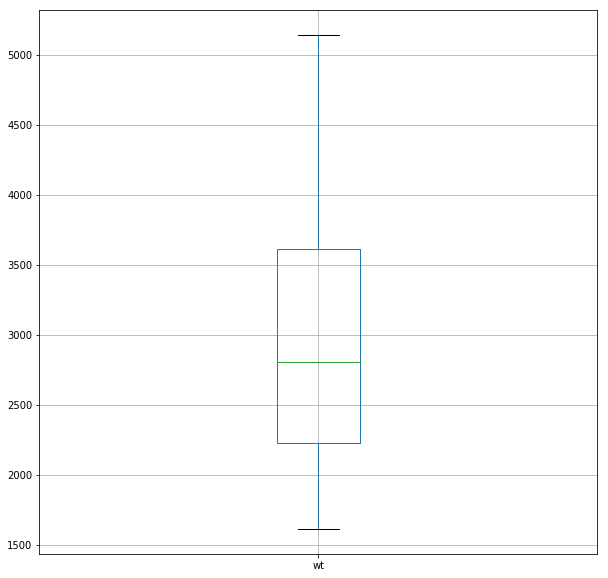

In [27]:
cr_dat[["wt"]].boxplot(figsize=(10,10))

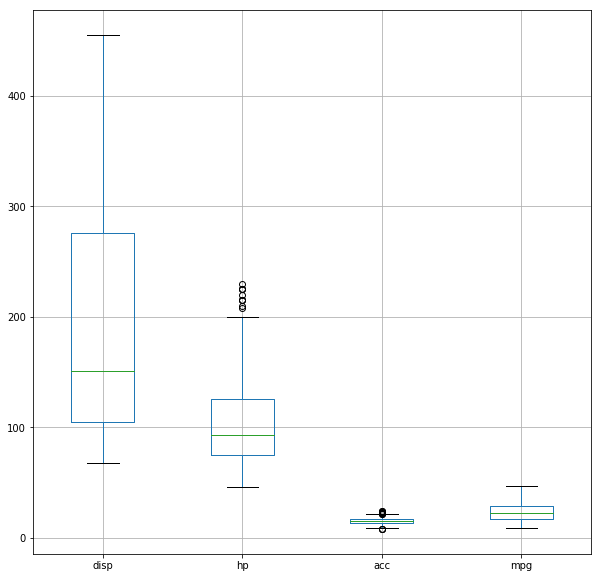

In [28]:
cr_dat[["disp","hp","acc","mpg"]].boxplot(figsize=(10,10))

In [29]:
#Removing outliers
def IQR_outliers_detect(column):
    q1 = cr_dat[column].quantile(.25)
    q3 = cr_dat[column].quantile(.75)
    IQR = q3-q1
    print("IQR : {}".format(IQR))
    upper = q3+(1.5*IQR)
    lower = q1-(1.5*IQR)
    print("upper cap : {}".format(upper))
    print("lower cap : {}".format(lower))

In [30]:
print(IQR_outliers_detect('hp'))
print(IQR_outliers_detect('acc'))

IQR : 51.0
upper cap : 202.5
lower cap : -1.5
None
IQR : 3.2499999999999964
upper cap : 21.89999999999999
lower cap : 8.900000000000007
None


In [31]:
cr_dat['hp'] = cr_dat.hp.map(lambda x : 202.5 if x > 202.5 else x)
cr_dat['acc'] = cr_dat.acc.map(lambda x : 21.8 if x > 21.8 else (8.91 if x < 8.9 else x))

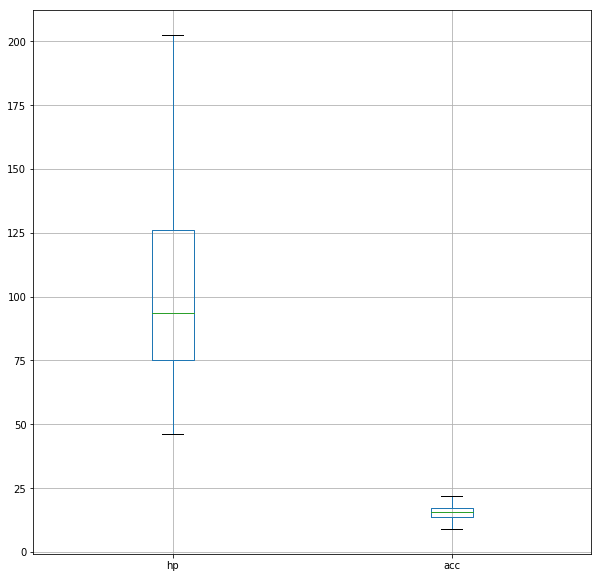

In [32]:
cr_dat[["hp","acc"]].boxplot(figsize=(10,10))

In [23]:
# Now the ouliers are treated,s0 From the box plot, we can findout  the observations are to be standardization,to find out the Z-score

In [33]:
# Droping the Car name column
cr_dat=cr_dat.drop(columns=["car name"])

In [34]:
cr_dat.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130.0,3504.0,12.0,70,18.0
1,8,350.0,165.0,3693.0,11.5,70,15.0
2,8,318.0,150.0,3436.0,11.0,70,18.0
3,8,304.0,150.0,3433.0,12.0,70,16.0
4,8,302.0,140.0,3449.0,10.5,70,17.0


In [35]:
#standardize the data
from scipy.stats import zscore
cr_dat = cr_dat.apply(zscore)

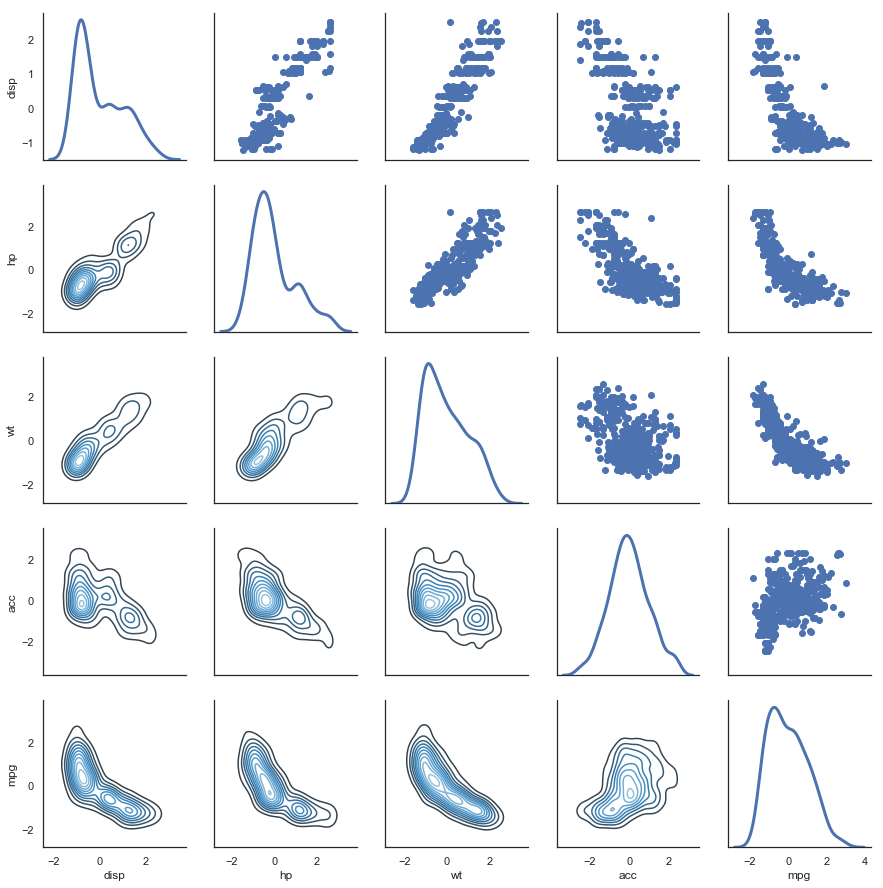

In [36]:
#Oberving the clusters and distribution with the help of pairplot/pairgrid
sns.set(style="white")
df = cr_dat.loc[:,["disp","hp","wt","acc","mpg"]]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

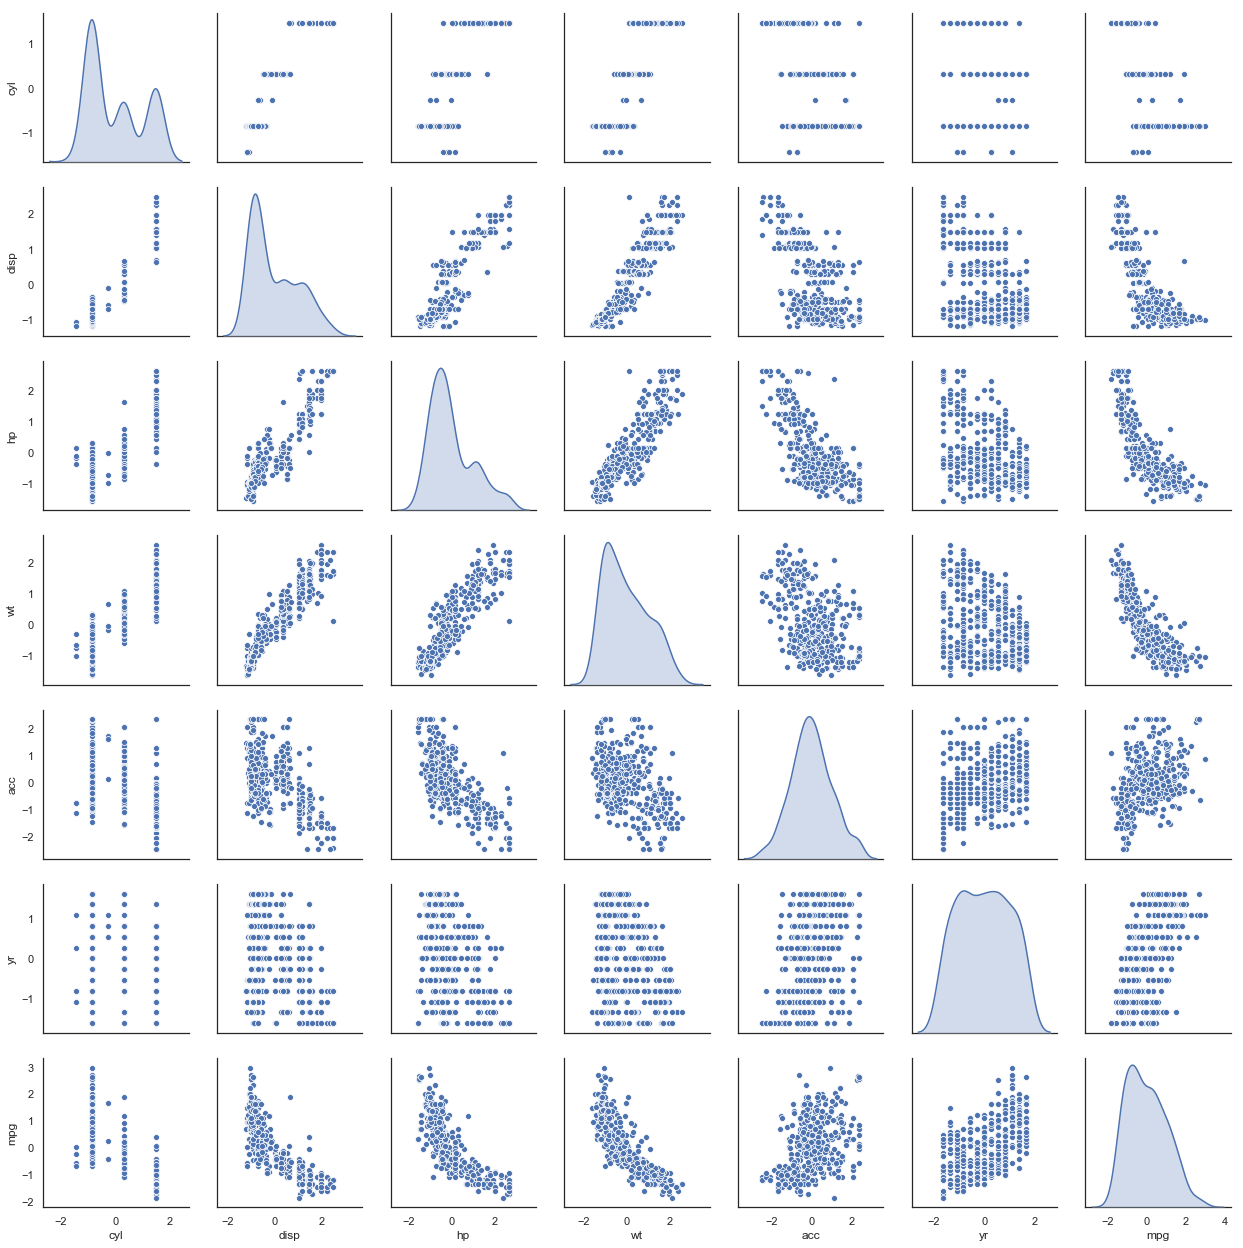

In [37]:
sns.pairplot(cr_dat,diag_kind="kde")

### Based on the pair plot, we can observe the list below:

1) Variable "cyl, disp, hp, wt" shows, there could be multiple class that this dataset exists <br>
2) Variblae "acc" shows a normal distribution <br>
3) "hp", "disp" shows positive co-relation to "wt" <br>
4) "mpg" is negatively co-related to "disp", "hp" and "wt"

In [38]:
print(cr_dat.shape)
cr_dat.head()

(392, 7)


,cyl,disp,hp,wt,acc,yr,mpg
0,1.483947,1.077290,0.696416,0.620540,-1.317688,-1.625315,-0.698638
1,1.483947,1.488732,1.635835,0.843334,-1.504929,-1.625315,-1.083498
2,1.483947,1.182542,1.233227,0.540382,-1.692170,-1.625315,-0.698638
3,1.483947,1.048584,1.233227,0.536845,-1.317688,-1.625315,-0.955212
4,1.483947,1.029447,0.964821,0.555706,-1.879411,-1.625315,-0.826925


### Spliting the model based on "KMeans" Clustering, then passing each Cluster though the Linear Regression 

In [40]:
from sklearn.cluster import KMeans

In [41]:
distortions=[]
for i in range(1, 15):
    km = KMeans(
        n_clusters=i, random_state=6
    )
    km.fit(cr_dat)
    distortions.append(km.inertia_)

In [42]:
## C-Distance:
distortions

[2744.0,
 1262.8111999124849,
 917.1712853421382,
 713.9861092323431,
 642.5802166110154,
 576.1639147736114,
 525.5540384240414,
 479.2371183022775,
 443.5119525067763,
 415.2449272754476,
 388.6535253511047,
 365.9788807700991,
 343.30509268532114,
 330.7463185102581]

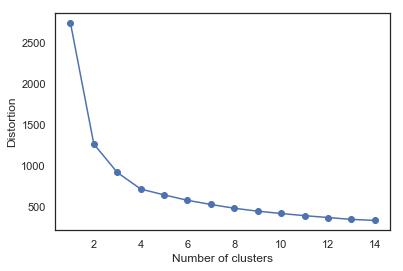

In [43]:
# plot
plt.plot(range(1, 15), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [44]:
# Based on the Elbow graph, considering 4 clusters (K) for building the model
cr_data_opt = KMeans(n_clusters=3,random_state=6)
cr_data_opt.fit(cr_dat)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=6, tol=0.0001, verbose=0)

In [45]:
cr_dat['Cluster']=cr_data_opt.labels_

In [46]:
#to find out the the first five columns through head function
cr_dat.head()

,cyl,disp,hp,wt,acc,yr,mpg,Cluster
0,1.483947,1.077290,0.696416,0.620540,-1.317688,-1.625315,-0.698638,1
1,1.483947,1.488732,1.635835,0.843334,-1.504929,-1.625315,-1.083498,1
2,1.483947,1.182542,1.233227,0.540382,-1.692170,-1.625315,-0.698638,1
3,1.483947,1.048584,1.233227,0.536845,-1.317688,-1.625315,-0.955212,1
4,1.483947,1.029447,0.964821,0.555706,-1.879411,-1.625315,-0.826925,1


In [47]:
# Dividing the dataset based on the opt cluster of 3
Cluster_1_cr_data=cr_dat[cr_dat["Cluster"]==0]
Cluster_2_cr_data=cr_dat[cr_dat["Cluster"]==1]
Cluster_3_cr_data=cr_dat[cr_dat["Cluster"]==2]

In [49]:
#To print the  records exist clsuter wise
print("Cluster 1:",Cluster_1_cr_data.shape)


Cluster 1: (95, 8)


In [50]:
print("Cluster 2:",Cluster_2_cr_data.shape)

Cluster 2: (95, 8)


In [51]:
print("Cluster 3:",Cluster_3_cr_data.shape)

Cluster 3: (202, 8)


In [52]:
Cluster_1_X=Cluster_1_cr_data.drop(columns=["Cluster","mpg"],axis=1)
Cluster_1_Y=Cluster_1_cr_data["mpg"]
Cluster_2_X=Cluster_2_cr_data.drop(columns=["Cluster","mpg"],axis=1)
Cluster_2_Y=Cluster_2_cr_data["mpg"]
Cluster_3_X=Cluster_3_cr_data.drop(columns=["Cluster","mpg"],axis=1)
Cluster_3_Y=Cluster_3_cr_data["mpg"]

In [53]:
from sklearn.linear_model import LinearRegression

cr_LiReg1 = LinearRegression()
cr_LiReg2 = LinearRegression()
cr_LiReg3 = LinearRegression()

In [54]:
cr_LiReg1.fit(Cluster_1_X,Cluster_1_Y)
cr_LiReg2.fit(Cluster_2_X,Cluster_2_Y)
cr_LiReg3.fit(Cluster_3_X,Cluster_3_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [55]:
cr_LiReg2.coef_

array([-0.38986468, -0.0679078 , -0.12347164, -0.11455318, -0.18116629,
        0.18060946])

In [56]:
print("Below the co-efficients of the 3 Clusters")
pd.DataFrame([cr_LiReg1.coef_,cr_LiReg2.coef_,cr_LiReg3.coef_],columns=["cyl","disp","hp","wt","acc","yr"]
            ,index=["Coeffients of Cluster 1","Coeffients of Cluster 2","Coeffients of Cluster 3"])

Below the co-efficients of the 3 Clusters


,cyl,disp,hp,wt,acc,yr
Coeffients of Cluster 1,0.150477,-0.053614,-0.095335,-0.386396,-0.085561,0.243334
Coeffients of Cluster 2,-0.389865,-0.067908,-0.123472,-0.114553,-0.181166,0.180609
Coeffients of Cluster 3,1.264018,-0.565536,-0.351916,-0.601158,-0.027380,0.420656


In [57]:
print("Total per Cluster\n",
      "Cluster1:",cr_LiReg1.score(Cluster_1_X,Cluster_1_Y),
      "\nCluster2:",cr_LiReg2.score(Cluster_2_X,Cluster_2_Y),
      "\nCluster3:",cr_LiReg3.score(Cluster_3_X,Cluster_3_Y))

Total per Cluster
 Cluster1: 0.47280677014563244 
Cluster2: 0.5790491822270376 
Cluster3: 0.6897474839723684


### Spliting the model based on Hierarchial Clustering, then passing each Cluster though the Linear Regression 

In [58]:
cr_dat=cr_dat.drop(columns=['Cluster'])

In [59]:
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(cr_dat)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [60]:
cr_dat['labels'] = model.labels_
cr_dat.head()

,cyl,disp,hp,wt,acc,yr,mpg,labels
0,1.483947,1.077290,0.696416,0.620540,-1.317688,-1.625315,-0.698638,1
1,1.483947,1.488732,1.635835,0.843334,-1.504929,-1.625315,-1.083498,1
2,1.483947,1.182542,1.233227,0.540382,-1.692170,-1.625315,-0.698638,1
3,1.483947,1.048584,1.233227,0.536845,-1.317688,-1.625315,-0.955212,1
4,1.483947,1.029447,0.964821,0.555706,-1.879411,-1.625315,-0.826925,1


In [61]:
Cluster_1_cr_data=cr_dat[cr_dat["labels"]==0]
Cluster_2_cr_data=cr_dat[cr_dat["labels"]==1]
Cluster_3_cr_data=cr_dat[cr_dat["labels"]==2]

In [51]:
print("Cluster 1:",Cluster_1_cr_data.shape,"\nCluster 2:",Cluster_2_cr_data.shape,"\nCluster 3:",Cluster_3_cr_data.shape)

Cluster 1: (86, 8) 
Cluster 2: (99, 8) 
Cluster 3: (207, 8)


In [62]:
Cluster_1_X=Cluster_1_cr_data.drop(columns=["labels","mpg"],axis=1)
Cluster_1_Y=Cluster_1_cr_data["mpg"]
Cluster_2_X=Cluster_2_cr_data.drop(columns=["labels","mpg"],axis=1)
Cluster_2_Y=Cluster_2_cr_data["mpg"]
Cluster_3_X=Cluster_3_cr_data.drop(columns=["labels","mpg"],axis=1)
Cluster_3_Y=Cluster_3_cr_data["mpg"]

In [63]:
from sklearn.linear_model import LinearRegression

cr_LiReg1 = LinearRegression()
cr_LiReg2 = LinearRegression()
cr_LiReg3 = LinearRegression()

In [64]:
cr_LiReg1.fit(Cluster_1_X,Cluster_1_Y)
cr_LiReg2.fit(Cluster_2_X,Cluster_2_Y)
cr_LiReg3.fit(Cluster_3_X,Cluster_3_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
print("Coefficient of three Clusters ")
pd.DataFrame([cr_LiReg1.coef_,cr_LiReg2.coef_,cr_LiReg3.coef_],columns=["cyl","disp","hp","wt","acc","yr"]
            ,index=["Coeffients of Cluster 1","Coeffients of Cluster 2","Coeffients of Cluster 3"])

Coefficient of three Clusters 


,cyl,disp,hp,wt,acc,yr
Coeffients of Cluster 1,0.426449,-0.074582,-0.045963,-0.404026,-0.105152,0.223630
Coeffients of Cluster 2,0.000000,-0.060518,-0.134661,-0.144659,-0.164086,0.184272
Coeffients of Cluster 3,1.017693,-0.419392,-0.411592,-0.640903,-0.026747,0.417639


In [66]:
print("Total per Cluster\n",
      "Cluster1:",cr_LiReg1.score(Cluster_1_X,Cluster_1_Y),
      "\nCluster2:",cr_LiReg2.score(Cluster_2_X,Cluster_2_Y),
      "\nCluster3:",cr_LiReg3.score(Cluster_3_X,Cluster_3_Y))

Total per Cluster
 Cluster1: 0.5502420120395581 
Cluster2: 0.6190067906440915 
Cluster3: 0.6957427668062057
